In [4]:
#importing libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
import warnings; warnings.filterwarnings("ignore"); warnings.simplefilter('ignore')
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score,jaccard_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
np.random.seed(0)
from sklearn.naive_bayes import GaussianNB
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import optimizers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import confusion_matrix

In [6]:
#reading data
df=pd.read_csv("milknew.csv")
df.head(5)

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


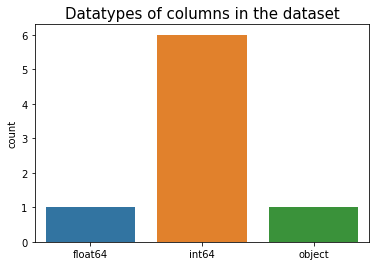

Count of the datatypes of columns
int64      6
float64    1
object     1
dtype: int64


In [7]:
#Analysis of the data
sns.countplot(df.dtypes)
plt.title("Datatypes of columns in the dataset",fontsize=15)
plt.show()
print("Count of the datatypes of columns")
print(df.dtypes.value_counts())

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [9]:
df.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [10]:
print(f'My DataSet contains {df.shape[0]} rows & {df.shape[1]} columns.')

My DataSet contains 1059 rows & 8 columns.


In [11]:
#checking presence of null values
df.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

In [12]:
#checking duplicated values
df.duplicated().sum()

976

In [13]:
df.loc[df.duplicated(),:]

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
35,6.8,45,0,1,1,1,255,high
48,9.5,34,1,1,0,1,255,low
50,6.6,37,1,1,1,1,255,high
51,5.5,45,1,0,1,1,250,low
52,4.5,60,0,1,1,1,250,low
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high


In [14]:
nv=[]
for i in df.columns:
    if (df[i].dtypes!='object'):
        nv.append(i)
print(nv)

['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour']


In [15]:
df['pH'].value_counts()

6.8    249
6.5    189
6.6    159
6.7     82
3.0     70
9.0     61
8.6     40
7.4     39
4.5     37
9.5     24
8.1     24
5.5     23
8.5     22
4.7     20
5.6     19
6.4      1
Name: pH, dtype: int64

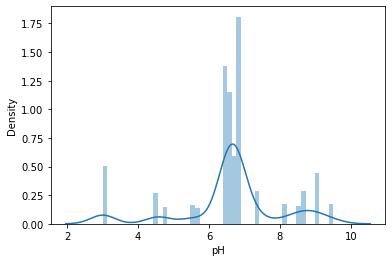

In [16]:
sns.distplot(df['pH'])
plt.show()

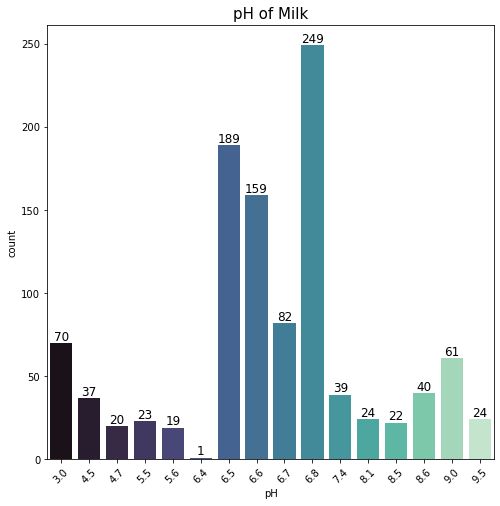

In [17]:
plt.figure(figsize=(8,8))
plt.title("pH of Milk",fontsize=15)
c1=sns.countplot(x='pH',data=df,palette="mako")
c1.bar_label(c1.containers[0],size=12)
plt.xticks(rotation=45)
plt.show()

#### Majority of the milk have pH less than 7 indicating that milk is slightly acidic in nature.

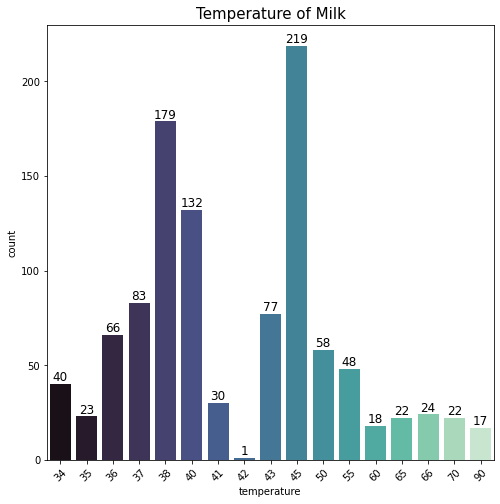

In [19]:
df = df.rename(columns={'Temprature':'temperature'})
plt.figure(figsize=(8,8))
plt.title("Temperature of Milk",fontsize=15)
c1=sns.countplot(x='temperature',data=df,palette="mako")
c1.bar_label(c1.containers[0],size=12)
plt.xticks(rotation=45)
plt.show()

#### The milk is mostly produced well under 50 degrees!

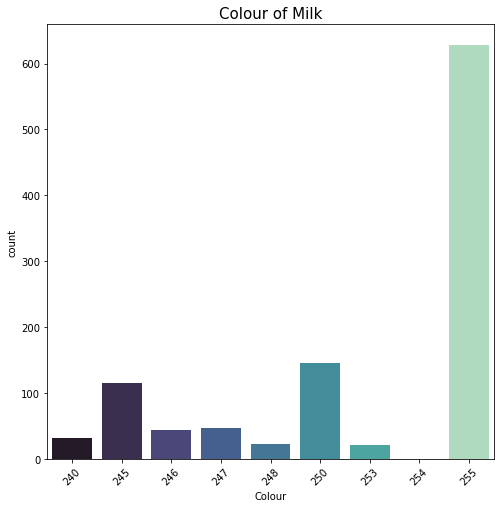

In [20]:
plt.figure(figsize=(8,8))
plt.title("Colour of Milk",fontsize=15)
c1=sns.countplot(x='Colour',data=df,palette="mako")
plt.xticks(rotation=45)
plt.show()

<AxesSubplot:xlabel='Fat ', ylabel='count'>

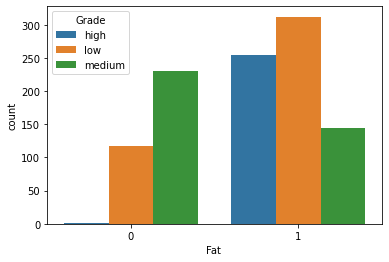

In [21]:
sns.countplot(x='Fat ',hue='Grade',data=df)

In [23]:
#statistical analysis of the data-set
df.describe()

,pH,temperature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [24]:
df.iloc[:,:-1]

,pH,temperature,Taste,Odor,Fat,Turbidity,Colour
0,6.6,35,1,0,1,0,254
1,6.6,36,0,1,0,1,253
2,8.5,70,1,1,1,1,246
3,9.5,34,1,1,0,1,255
4,6.6,37,0,0,0,0,255
...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247
1055,6.7,38,1,0,1,0,255
1056,3.0,40,1,1,1,1,255
1057,6.8,43,1,0,1,0,250


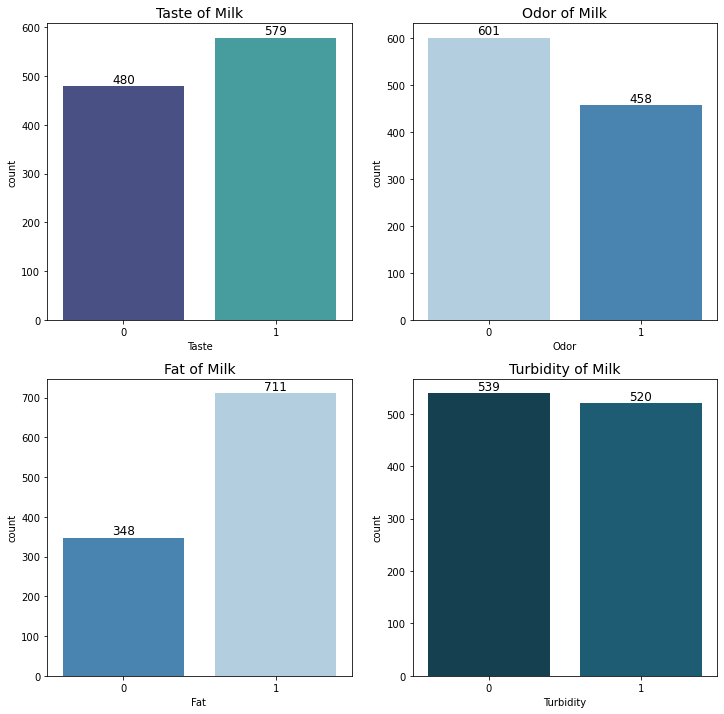

In [25]:
fig, ax = plt.subplots(2, 2, figsize=(12,12))

ax[0, 0].set_title("Taste of Milk",fontsize=14)
c1=sns.countplot(df['Taste'],palette="mako",ax=ax[0][0])
c1.bar_label(c1.containers[0],size=12)

ax[0, 1].set_title("Odor of Milk",fontsize=14)
c2=sns.countplot(df['Odor'],palette="Blues",ax=ax[0][1])
c2.bar_label(c2.containers[0],size=12)

ax[1, 0].set_title("Fat of Milk",fontsize=14)
c3=sns.countplot(df['Fat '],palette="Blues_r",ax=ax[1][0])
c3.bar_label(c3.containers[0],size=12)

ax[1, 1].set_title("Turbidity of Milk",fontsize=14)
c4=sns.countplot(df['Turbidity'],palette=['#0b445a','#0f6281'],ax=ax[1][1])
c4.bar_label(c4.containers[0],size=12)
plt.show()

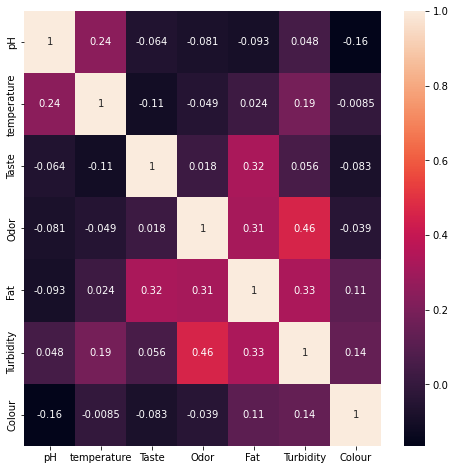

In [26]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [29]:
x =df.groupby('Grade')[['Colour']].mean().reset_index()
x

,Grade,Colour
0,high,252.539062
1,low,252.734266
2,medium,250.336898


In [31]:
x =df.groupby('Grade')[['pH']].mean().reset_index()
x

,Grade,pH
0,high,6.692578
1,low,6.588578
2,medium,6.635027


In [32]:
B=df.groupby('Grade')
x=B.get_group('medium')
x

,pH,temperature,Taste,Odor,Fat,Turbidity,Colour,Grade
4,6.6,37,0,0,0,0,255,medium
9,6.7,45,1,1,0,0,247,medium
10,6.7,45,1,1,1,0,245,medium
15,6.5,38,1,0,0,0,255,medium
19,6.8,40,1,0,1,0,245,medium
...,...,...,...,...,...,...,...,...
1045,6.5,36,0,0,0,0,247,medium
1046,6.6,38,0,0,0,0,255,medium
1049,6.5,37,0,0,0,0,255,medium
1052,6.5,40,1,0,0,0,250,medium


In [33]:
grade_medium=pd.DataFrame(x)
grade_medium.describe()

,pH,temperature,Taste,Odor,Fat,Turbidity,Colour
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,6.635027,39.721925,0.414439,0.163102,0.385027,0.125668,250.336898
std,0.130899,3.613751,0.493285,0.369953,0.487253,0.331919,5.262430
min,6.400000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,37.000000,0.000000,0.000000,0.000000,0.000000,245.000000
50%,6.600000,38.000000,0.000000,0.000000,0.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,0.000000,1.000000,0.000000,255.000000
max,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [34]:
fat_value=grade_medium.groupby('Fat ')[['Colour']].mean().reset_index()
fat_value

,Fat,Colour
0,0,250.269565
1,1,250.444444


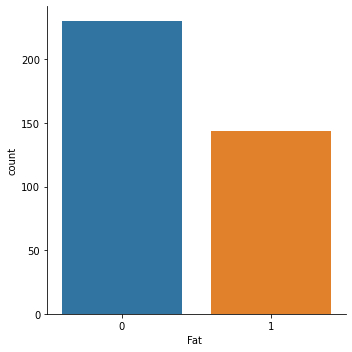

In [35]:
sns.catplot(x='Fat ',kind='count',data=grade_medium)

In [36]:
X = df.drop('Grade',axis=1).values
y = df[["Grade"]]

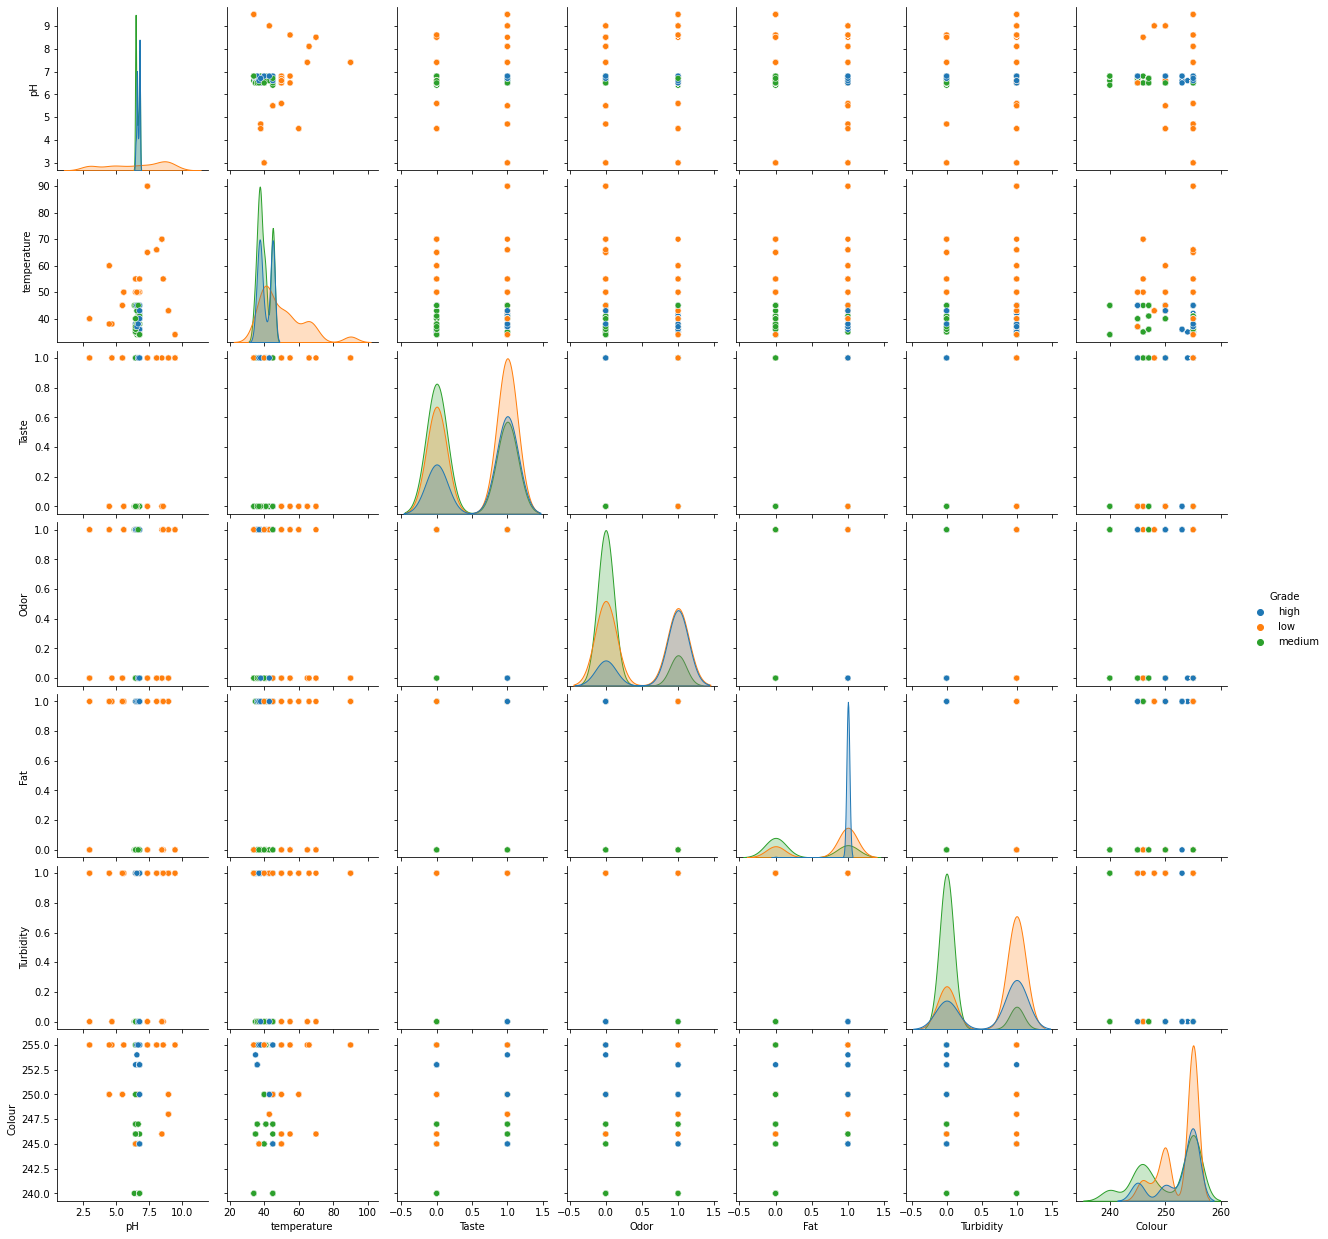

In [37]:
p = sns.pairplot(df,hue="Grade")
plt.show()

#### By looking at the KDE plot of features, all features have different distribution with respect to their quality. Yet,it is unknown which one accounts for the most importance and hence we will determine it later by PCA.

In [38]:
sc_X=StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(X))

In [39]:
X.head()

,0,1,2,3,4,5,6
0,-0.021531,-0.914107,0.910503,-0.872962,0.699608,-0.982217,0.501600
1,-0.021531,-0.815035,-1.098294,1.145525,-1.429372,1.018105,0.269333
2,1.336564,2.553438,0.910503,1.145525,0.699608,1.018105,-1.356536
3,2.051351,-1.013180,0.910503,1.145525,-1.429372,1.018105,0.733867
4,-0.021531,-0.715962,-1.098294,-0.872962,-1.429372,-0.982217,0.733867


### Splitting the data into the training and test set

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(741, 5)
(741, 5)
(318, 5)
(318, 5)


## KNN

In [41]:
test_acc=[]
train_acc=[]

for i in range(1,15):
  knn = KNeighborsClassifier(i) #setting up a knn classifier
  knn.fit(X_train,y_train)
  train_acc.append(knn.score(X_train,y_train))
  test_acc.append(knn.score(X_test,y_test))

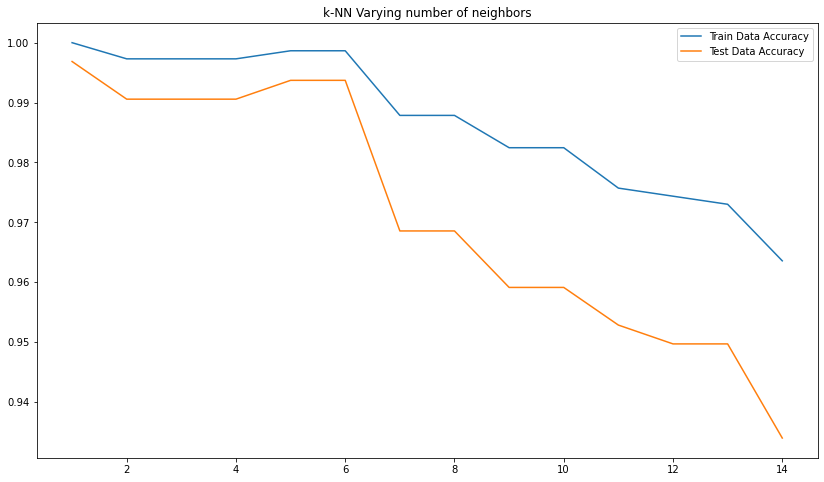

In [42]:
plt.figure(figsize=(14,8))
plt.title('k-NN Varying number of neighbors')
sns.lineplot(range(1,15),train_acc,label='Train Data Accuracy')
sns.lineplot(range(1,15),test_acc,label='Test Data Accuracy')
plt.show()

In [43]:
knn = KNeighborsClassifier(4)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9905660377358491

<IPython.core.display.Javascript object>

0.9968553459119497 0.9963657466868359 0.9971014492753624 0.9956709956709956 0.992772444946358 0.9951842260687838


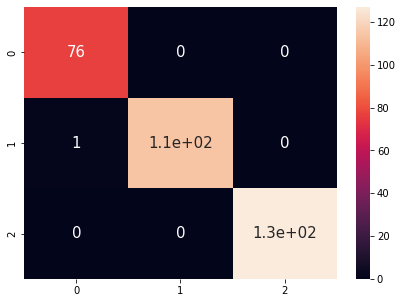

In [44]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train.values.ravel())
pred = knn.predict(X_test)
plt.subplots(figsize=(7,5))
cf_matrix = confusion_matrix(y_test, pred)
sns.heatmap(cf_matrix,annot = True, annot_kws = {'size':15})

acc=accuracy_score(y_test, pred , normalize=True, sample_weight=None)
f1 = f1_score(y_test,pred , labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')
re =recall_score(y_test, pred,labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')
pre= precision_score(y_test,pred , labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')
js = jaccard_score(y_test, pred,  labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')
ks = sklearn.metrics.cohen_kappa_score(y_test, pred, labels=None, weights=None, sample_weight=None)
print (acc,f1, re,pre,js,ks)

## Random Forest

In [49]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [50]:
yr_pred = rfc.predict(X_test)

<IPython.core.display.Javascript object>

0.9968553459119497 0.9963657466868359 0.9971014492753624 0.9956709956709956 0.992772444946358 0.9951842260687838


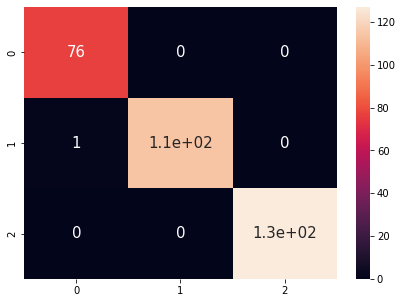

In [51]:
plt.subplots(figsize=(7,5))
cf_matrix = confusion_matrix(y_test, yr_pred)
sns.heatmap(cf_matrix,annot = True, annot_kws = {'size':15})

acc=accuracy_score(y_test, yr_pred , normalize=True, sample_weight=None)
f1 = f1_score(y_test,yr_pred , labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')
re =recall_score(y_test, yr_pred,labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')
pre= precision_score(y_test,yr_pred , labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')
js = jaccard_score(y_test, yr_pred,  labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')
ks = sklearn.metrics.cohen_kappa_score(y_test, yr_pred, labels=None, weights=None, sample_weight=None)
print (acc,f1, re,pre,js,ks)

## Support Vector Machine(SVM)

<IPython.core.display.Javascript object>

0.9528301886792453 0.94803059549968 0.9515495774698643 0.9452976011241594 0.9036083790381061 0.9279858689252231


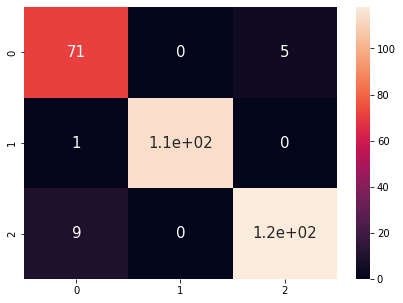

In [52]:
clf = svm.SVC(decision_function_shape='ovo',C=10,kernel='poly')
clf.fit(X_train, y_train.values.ravel())
pred=clf.predict(X_test)
plt.subplots(figsize=(7,5))
cf_matrix = confusion_matrix(y_test, pred)
sns.heatmap(cf_matrix,annot = True, annot_kws = {'size':15})

acc=accuracy_score(y_test, pred , normalize=True, sample_weight=None)
f1 = f1_score(y_test, pred , labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')
re =recall_score(y_test, pred,labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')
pre= precision_score(y_test,pred , labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')
js = jaccard_score(y_test, pred,  labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')
ks = sklearn.metrics.cohen_kappa_score(y_test, pred, labels=None, weights=None, sample_weight=None)
print (acc,f1, re,pre,js,ks)

## Logistic Regression(LR)

In [54]:
lgr = LogisticRegression()
lgr.fit(X_train, y_train)
y_pred = lgr.predict(X_test)

<IPython.core.display.Javascript object>

0.8490566037735849 0.8416305916305916 0.8487720499468457 0.8397410621526266 0.7293556403606636 0.7710480133195339


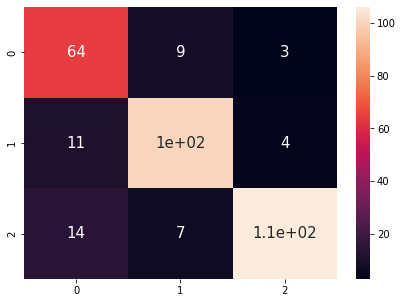

In [55]:
plt.subplots(figsize=(7,5))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix,annot = True, annot_kws = {'size':15})

acc=accuracy_score(y_test, y_pred , normalize=True, sample_weight=None)
f1 = f1_score(y_test,y_pred , labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')
re =recall_score(y_test, y_pred,labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')
pre= precision_score(y_test,y_pred , labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')
js = jaccard_score(y_test, y_pred,  labels=None, pos_label=1, average='macro', sample_weight=None, zero_division='warn')
ks = sklearn.metrics.cohen_kappa_score(y_test, y_pred, labels=None, weights=None, sample_weight=None)
print (acc,f1, re,pre,js,ks)

In [58]:
df = df.rename(columns={"Fat ": "Fat"})
df.describe()

,pH,temperature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


## PCA of features

In [64]:
le = LabelEncoder()
le.fit(['low', 'medium', 'high'])

X = df.drop('Grade', axis=1)
y = le.fit_transform(df.Grade)


In [65]:
pca = PCA(.95)
pca.fit(X)

PCA(n_components=0.95)

In [66]:
pca.explained_variance_ratio_

array([0.82711028, 0.15081637])

In [67]:
print(pd.DataFrame(pca.components_,columns=X.columns,index = ['PC-1','PC-2']))

            pH  temperature     Taste      Odor      Fat  Turbidity    Colour
PC-1  0.034563     0.999331 -0.005422 -0.002404  0.00109   0.009167 -0.004789
PC-2  0.058047    -0.006565  0.009625  0.004325 -0.01278  -0.016217 -0.998023


####  We get to observe here that temperature and color have over 95% composition to PC-1 and PC-2. For milk factory to ensure the quality of their product, these two parameters are the first priority.

<AxesSubplot:xlabel='temperature', ylabel='Colour'>

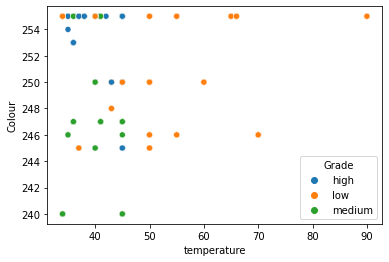

In [70]:
sns.scatterplot(data=df, x='temperature', y='Colour', hue='Grade')

## Artificial Neural Network (ANN)

In [73]:
X = df.iloc[:, 3:13].values
y = df.iloc[:, 3:13].values

In [74]:
print(X)
print(y)

[[0 1 0 254 'high']
 [1 0 1 253 'high']
 [1 1 1 246 'low']
 ...
 [1 1 1 255 'low']
 [0 1 0 250 'high']
 [1 1 1 255 'low']]
[[0 1 0 254 'high']
 [1 0 1 253 'high']
 [1 1 1 246 'low']
 ...
 [1 1 1 255 'low']
 [0 1 0 250 'high']
 [1 1 1 255 'low']]


#### Encoding categorical data

In [77]:
encoder=LabelEncoder()
df['Grade']=encoder.fit_transform(df['Grade'])
df

,pH,temperature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,0
1,6.6,36,0,1,0,1,253,0
2,8.5,70,1,1,1,1,246,1
3,9.5,34,1,1,0,1,255,1
4,6.6,37,0,0,0,0,255,2
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,2
1055,6.7,38,1,0,1,0,255,0
1056,3.0,40,1,1,1,1,255,1
1057,6.8,43,1,0,1,0,250,0


In [88]:
sns.set_theme()
sns.set(rc = {'figure.figsize':(12,6)})
SEED = 2022

X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:,:-1], 
    df.iloc[:,-1],
    test_size = 0.2,
    random_state = 12345
)
X_train.dtypes

pH             float64
temperature      int64
Taste            int64
Odor             int64
Fat              int64
Turbidity        int64
Colour           int64
dtype: object

In [89]:
X_train

,pH,temperature,Taste,Odor,Fat,Turbidity,Colour
65,6.8,45,0,0,0,1,255
920,8.6,55,0,1,0,0,255
509,6.6,50,0,0,0,1,250
53,8.1,66,1,0,1,1,255
193,6.7,38,1,0,1,0,255
...,...,...,...,...,...,...,...
769,3.0,40,1,1,1,1,255
546,5.5,45,1,0,1,1,250
382,9.0,43,1,0,1,1,250
129,6.5,36,0,0,1,0,255


In [90]:
print(y_train)

65     2
920    1
509    1
53     1
193    0
      ..
769    1
546    1
382    1
129    2
482    2
Name: Grade, Length: 847, dtype: int64


#### Feature Scaling

In [91]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train.shape,
X_test.shape,
y_train.shape,
y_test.shape)

(847, 7) (212, 7) (847,) (212,)


#### Building the ANN Model

In [93]:
classifier = Sequential()
classifier.add(Dense(units=20, input_dim=7, kernel_initializer='uniform', activation='relu'))
classifier.add(Dense(units=15, kernel_initializer='uniform', activation='relu'))
classifier.add(Dense(units=10, kernel_initializer='uniform', activation='relu'))
classifier.add(Dense(units=3, kernel_initializer='uniform', activation='softmax'))
classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
survivalANN_Model=classifier.fit(X_train,y_train, batch_size=10, epochs=30, verbose=1)

Epoch 1/30
85/85 [==============================] - 0s 1ms/step - loss: 1.0888 - accuracy: 0.4475
Epoch 2/30
85/85 [==============================] - 0s 1ms/step - loss: 0.9408 - accuracy: 0.6021
Epoch 3/30
85/85 [==============================] - 0s 1ms/step - loss: 0.7752 - accuracy: 0.7214
Epoch 4/30
85/85 [==============================] - 0s 1ms/step - loss: 0.6011 - accuracy: 0.7367
Epoch 5/30
85/85 [==============================] - 0s 1ms/step - loss: 0.5170 - accuracy: 0.7344
Epoch 6/30
85/85 [==============================] - 0s 1ms/step - loss: 0.4575 - accuracy: 0.7391
Epoch 7/30
85/85 [==============================] - 0s 1ms/step - loss: 0.4102 - accuracy: 0.7591
Epoch 8/30
85/85 [==============================] - 0s 1ms/step - loss: 0.3412 - accuracy: 0.8560
Epoch 9/30
85/85 [==============================] - 0s 1ms/step - loss: 0.2464 - accuracy: 0.9185
Epoch 10/30
85/85 [==============================] - 0s 1ms/step - loss: 0.1643 - accuracy: 0.9599
Epoch 11/30
85/85 [